In [1]:
import numpy as np
import numpy as np
from plotnine import *

In [2]:
# Para no tener que repetir todo el rato lo mismo se procesa el dataframe en un archivo
%run config.py
from config import df


### El problema de la función XOR

En esta sección se explora la limitación de los modelos lineales para resolver problemas no linealmente separables, utilizando la función lógica XOR como ejemplo paradigmático. Veremos cómo las funciones AND y OR pueden ser separadas linealmente, mientras que la función XOR no es separable. Uno de los motivos históricos para el desarrollo de redes neuronales fue la incapacidad de los modelos lineales para resolver problemas como el de la función XOR.

En primer lugar, mostramos las tres funciones lógicas:

In [3]:

X = [(0,0), (0,1), (1,0), (1,1)]
df = pd.DataFrame(X, columns=["x1", "x2"])
df["AND"] = df["x1"] & df["x2"]
df["OR"] = df["x1"] | df["x2"]
df["XOR"] = df["x1"] ^ df["x2"]
df


,x1,x2,AND,OR,XOR
0,0,0,0,0,0
1,0,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,0


Usamos un gráfico para mostrar cómo se distribuyen las clases en el plano \((x_1, x_2)\). Cada punto está coloreado según la salida de la función correspondiente.


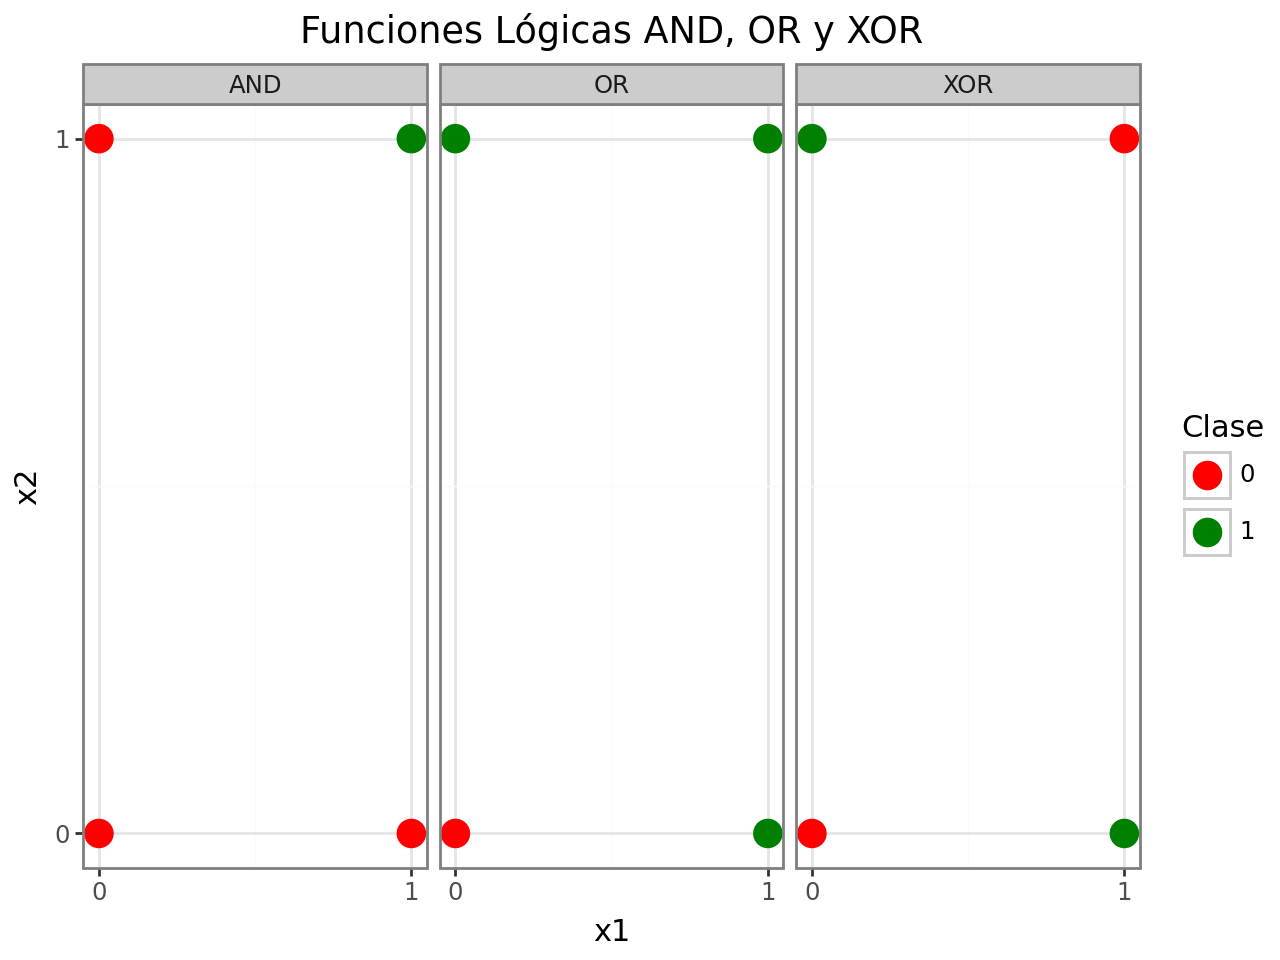

In [4]:

df_melt = df.melt(id_vars=["x1", "x2"], value_vars=["AND", "OR", "XOR"], 
                  var_name="func", value_name="y")

(
ggplot(df_melt, aes("x1", "x2", color="factor(y)")) +
 geom_point(size=5) +
 facet_wrap("~func") +
 scale_color_manual(values=["red", "green"]) +
 scale_x_continuous(breaks=[0, 1]) +
 scale_y_continuous(breaks=[0, 1]) +
 labs(title="Funciones Lógicas AND, OR y XOR", color="Clase") +
 theme_bw()
)

Observamos en los gráficos de AND y OR que los puntos correspondientes a un resultado (0 o 1) pueden
ser separados por una línea recta. Esto indica que estas funciones son **linealmente separables**.

Para las funciones linealmente separables como AND y OR, podemos encontrar modelos lineales (como la regresión
logística) que definan una frontera de decisión capaz de clasificar correctamente todas las entradas. La
frontera de decisión en un espacio bidimensional (como nuestro caso con dos entradas) es una línea recta,
definida por la ecuación:

$\qquad w_1x_1 + w_2x_2 + b = 0$

donde $x_1$ e $x_2$ son las entradas, $w_1$ y $w_2$ son los pesos, y $b$ es el intercepto también llamado sesgo. El signo del resultado
de esta ecuación determina
la clase predicha.

**Ejemplo para la función AND:**

Una posible frontera de decisión para la función AND podría estar definida por la siguiente desigualdad:

$\qquad 1 \cdot x_1 + 1 \cdot x_2 - 1.5 > 0 \implies \text{Predicción} = 1 \text{ (AND es Verdadero)}$

Vamos a verificar esto para nuestros inputs:
- Para (0, 0): $1 \cdot 0 + 1 \cdot 0 - 1.5 = -1.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (0, 1): $1 \cdot 0 + 1 \cdot 1 - 1.5 = -0.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (1, 0): $1 \cdot 1 + 1 \cdot 0 - 1.5 = -0.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (1, 1): $1 \cdot 1 + 1 \cdot 1 - 1.5 = 0.5 > 0 \implies \text{Predicción} = 1$ (Correcto)

La línea de decisión correspondiente sería $x_1 + x_2 - 1.5 = 0$, o $x_2 = -x_1 + 1.5$.

**Ejemplo para la función OR:**

Una posible frontera de decisión para la función OR podría estar definida por la siguiente desigualdad:

$\qquad 1 \cdot x_1 + 1 \cdot x_2 - 0.5 > 0 \implies \text{Predicción} = 1 \text{ (OR es Verdadero)}$

Verificamos esto para nuestros inputs:
- Para (0, 0): $1 \cdot 0 + 1 \cdot 0 - 0.5 = -0.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (0, 1): $1 \cdot 0 + 1 \cdot 1 - 0.5 = 0.5 > 0 \implies \text{Predicción} = 1$ (Correcto)
- Para (1, 0): $1 \cdot 1 + 1 \cdot 0 - 0.5 = 0.5 > 0 \implies \text{Predicción} = 1$ (Correcto)
- Para (1, 1): $1 \cdot 1 + 1 \cdot 1 - 0.5 = 1.5 > 0 \implies \text{Predicción} = 1$ (Correcto)

La línea de decisión correspondiente sería $x_1 + x_2 - 0.5 = 0$, o $x_2 = -x_1 + 0.5$.

Estos ejemplos muestran cómo una única línea recta puede separar las clases para AND y OR.



Sin embargo, al observar el gráfico de XOR, vemos que no existe una única línea recta que pueda separar
los puntos donde el resultado es 0 de aquellos donde el resultado es 1. Por lo tanto, la función
XOR **no es linealmente separable**. Una regresión logística no podría resolver este problema, ya que
vimos en la sección anterior que este tipo de modelo solo puede aprender funciones lineales.

### La Solución con dos neuronas

La solución para problemas no linealmente separables como XOR radica en usar las predicciones de las funciones AND y OR como entrada de una nueva ecuación.

Una posible solución es conectar las salidas de las funciones AND y OR con una nueva ecuación:


$\qquad 1 \cdot (\text{salida de OR}) - 1 \cdot (\text{salida de AND}) - 0.5 > 0 \implies \text{Predicción} = 1 \text{ (XOR es Verdadero)}$

Vamos a verificar esto para nuestros inputs:
- Para (0, 0): $1 \cdot 0 - 1 \cdot 0 - 0.5 = - 0.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (1, 0): $1 \cdot 1 - 1 \cdot 0 - 0.5 = 0.5 > 0 \implies \text{Predicción} = 1$ (Correcto)
- Para (1, 1): $1 \cdot 1 - 1 \cdot 1 - 0.5 = -0.5 \ngtr 0 \implies \text{Predicción} = 0$ (Correcto)
- Para (0, 1): Este caso es imposible. Nunca cuando OR produce 0, AND produce 1. Por lo tanto, no es necesario verificarlo.

Este ejemplo demuestra que incluso si una función no es linealmente separable, podemos usar la salida de otras funciones como entrada de una nueva función lineal y resolver el problema. Sin embargo, podemos demostrar fácilmente que si combinamos las salidas de dos funciones lineales con otra función lineal, la salida será una nueva función lineal. 

(Opcional) Por ejemplo, sean dos funciones lineales:

$\qquad f_1(x_1, x_2) = w_{11}x_1 + w_{12}x_2 + b_1$

$\qquad f_2(x_1, x_2) = w_{21}x_1 + w_{22}x_2 + b_2$

Ahora, consideremos una combinación lineal de estas dos funciones:

$\qquad g(x_1, x_2) = v_1 f_1(x_1, x_2) + v_2 f_2(x_1, x_2) + c$

Donde $v_1$, $v_2$ y $c$ son constantes (pesos y sesgo de la combinación lineal). Sustituyendo las expresiones de $f_1$ y $f_2$ en $g$:

$\qquad g(x_1, x_2) = v_1 (w_{11}x_1 + w_{12}x_2 + b_1) + v_2 (w_{21}x_1 + w_{22}x_2 + b_2) + c$

Distribuyendo los pesos $v_1$ y $v_2$:

$\qquad g(x_1, x_2) = (v_1 w_{11})x_1 + (v_1 w_{12})x_2 + (v_1 b_1) + (v_2 w_{21})x_1 + (v_2 w_{22})x_2 + (v_2 b_2) + c$

Reagrupando los términos con $x_1$ y $x_2$:

$\qquad g(x_1, x_2) = (v_1 w_{11} + v_2 w_{21})x_1 + (v_1 w_{12} + v_2 w_{22})x_2 + (v_1 b_1 + v_2 b_2 + c)$

Si definimos nuevos pesos $W_1 = v_1 w_{11} + v_2 w_{21}$, $W_2 = v_1 w_{12} + v_2 w_{22}$ y un nuevo sesgo $B = v_1 b_1 + v_2 b_2 + c$, podemos reescribir $g(x_1, x_2)$ como:

$\qquad g(x_1, x_2) = W_1 x_1 + W_2 x_2 + B$

Esta expresión tiene la misma forma que la función lineal original. Por lo tanto, una combinación lineal de funciones lineales sigue siendo una función lineal. Entonces, ¿cómo hemos conseguido resolver el problema de la función XOR combinando dos funciones lineales? La respuesta es que antes de combinar las funciones hemos tomado la decisión de predecir 1 si la salida era mayor que 0 y 0 en caso contrario. Esta decisión no es lineal, y por lo tanto, la combinación de funciones lineales no es lineal. En otras palabras, la combinación de funciones lineales con una función no lineal (llamada función de activación) nos permite resolver problemas no linealmente separables. Para la función XOR la función de activación utilizada se conoce con el nombre de STEP, aunnque hay otras muchas, siendo la más popular una conocida como ReLU. Lo podemos ver gráficamente para la función XOR:

```mermaid
graph LR
    A((Input 1)) --> AND
    B((Input 2)) --> AND
    A --> OR
    B --> OR

    subgraph Círculo_AND [ ]
        direction LR
        AND --> Act1(Activation)
    end

    subgraph Círculo_OR [ ]
        direction LR
        OR --> Act4(Activation)
    end

    subgraph Círculo_XOR [ ]
        direction LR
        XOR --> Act3(Activation)
    end

    Act1 --> XOR
    Act4 --> XOR
    Act3 --> C((Output))

```
Cuantas más funciones lineales combinamos, mayor será la complejidad de la función resultante, lo que nos permite abordar problemas cada vez más complejos. Esta es precisamente la base de las redes neuronales. En una red neuronal, cada neurona aplica primero una transformación lineal a sus entradas, y luego una función de activación no lineal a la salida. Esta combinación de componentes lineales y no lineales es lo que permite a la red modelar relaciones complejas y no evidentes en los datos. Las redes neuronales están inspiradas en el cerebro humano, donde las neuronas se activan o no en función de la intensidad de las señales que reciben.

En el diagrama anterior, se muestra una red neuronal con tres tipos de capas: una capa de entrada, una o más capas ocultas (que son todas las capas intermedias) y una capa de salida. Cuantas más capas ocultas tenga la red y mayor sea el número de neuronas por capa, mayor será su capacidad para aprender representaciones complejas. Sin embargo, esto también aumenta el riesgo de sobreajuste y el coste computacional.

Una de las preguntas clave al diseñar una red neuronal es: ¿cuántas capas ocultas y cuántas neuronas por capa se necesitan para resolver un problema específico? La verdad es que no existe una respuesta única ni exacta. En la práctica, suele comenzarse con una arquitectura sencilla e ir ajustándola progresivamente, añadiendo más capas o neuronas según sea necesario. Tanto el número de capas, como el número de neuronas por capa, así como las funciones de activación utilizadas, se consideran hiperparámetros del modelo, y deben ajustarse cuidadosamente. En general, si se plantea la duda entre aumentar el número de neuronas por capa o añadir más capas, se ha observado que incrementar el número de neuronas suele facilitar un aprendizaje más eficiente, al menos en las primeras etapas de diseño del modelo.

En el siguiente diagrama se muestra una red con tres capas ocultas y tres neuronas por capa:

```mermaid
graph LR
    subgraph Input Layer
        I1((I1))
        I2((I2))
        I3((I3))
    end
    subgraph Hidden Layer 1
        H1_1((H1_1))
        H1_2((H1_2))
        H1_3((H1_3))
    end
    subgraph Hidden Layer 2
        H2_1((H2_1))
        H2_2((H2_2))
        H2_3((H2_3))
    end
    subgraph Hidden Layer 3
        H3_1((H3_1))
        H3_2((H3_2))
        H3_3((H3_3))
    end
    subgraph Output Layer
        O1((O1))
        O2((O2))
        O3((O3))
    end

    I1 --> H1_1 & H1_2 & H1_3
    I2 --> H1_1 & H1_2 & H1_3
    I3 --> H1_1 & H1_2 & H1_3

    H1_1 --> H2_1 & H2_2 & H2_3
    H1_2 --> H2_1 & H2_2 & H2_3
    H1_3 --> H2_1 & H2_2 & H2_3

    H2_1 --> H3_1 & H3_2 & H3_3
    H2_2 --> H3_1 & H3_2 & H3_3
    H2_3 --> H3_1 & H3_2 & H3_3

    H3_1 --> O1 & O2 & O3
    H3_2 --> O1 & O2 & O3
    H3_3 --> O1 & O2 & O3
```

### MNIST con redes neuronales

Volvamos al desafío de la clasificación de imágenes de dígitos. Si bien Scikit-learn ofrece capacidades para entrenar redes neuronales, para tareas más complejas y modelos avanzados, resulta ventajoso recurrir a librerías más populares y potentes como PyTorch o TensorFlow. En este ejemplo, optaremos por PyTorch, cuya sintaxis a menudo se percibe como más intuitiva y flexible para la investigación y el desarrollo. Para aquellos que prefieran TensorFlow, se recomienda encarecidamente utilizar su API de alto nivel Keras, que simplifica significativamente la construcción y el entrenamiento de redes neuronales.



Cargamos los `datasets` y hacemos el mismo preprocesado que hicimos en la lección anterior.

In [5]:
train_data = np.loadtxt('datasets/mnist_train.csv', delimiter=',')
test_data = np.loadtxt('datasets/mnist_train.csv', delimiter=',')

train_y = train_data[:, 0]  # Primera columna como etiquetas
train_X = train_data[:, 1:]  # Resto como características
test_y = test_data[:, 0]  # Primera columna como etiquetas
test_X = test_data[:, 1:]  # Resto como características

train_X = train_X / 255.0  # Normalizar etiquetas entre 0 y 1
test_X = test_X / 255.0  # Normalizar características entre 0 y 1

Ahora hacemos el preprocesado necesario en Pytorch

In [8]:
# Importar bibliotecas necesarias
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Convertir datos numpy a tensores de PyTorch
# Los tensores son la estructura básica de datos en PyTorch
train_X_tensor = torch.from_numpy(train_X).float()  # float para decimales
train_y_tensor = torch.from_numpy(train_y).long()   # long para enteros (etiquetas)
test_X_tensor = torch.from_numpy(test_X).float()
test_y_tensor = torch.from_numpy(test_y).long()

# Crear conjuntos de datos y cargadores (DataLoader)
# DataLoader ayuda a manejar lotes (batches) de datos durante el entrenamiento
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)

# Configurar parámetros del DataLoader
batch_size = 64  # Número de muestras que procesamos a la vez
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


A continuación definimos el modelo. Hemos elegido un modelo sencilla con dos capas ocultas de 10 neuronas cada una y función de activación ReLU.

In [23]:
class RedMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        # Capa para aplanar la imagen de 28x28 a un vector de 784
        self.flatten = nn.Flatten()
        
        # Definimos la arquitectura secuencial:
        # Capa 1: Entrada (784) -> 10 neuronas + ReLU
        # Capa 2: 10 -> 10 neuronas + ReLU
        # Capa 3: 10 -> 10 neuronas (salida) + Softmax
        self.red = nn.Sequential(
            nn.Linear(28*28, 10),  # Primera capa lineal
            nn.ReLU(),             # Función de activación ReLU
            nn.Linear(10, 10),     # Segunda capa lineal
            nn.ReLU(),             # Función de activación ReLU
            nn.Linear(10, 10),     # Tercera capa lineal (salida)
            nn.Softmax(dim=1)      # Softmax para obtener probabilidades
        )
    
    def forward(self, x):
        x = self.flatten(x)  # Aplanamos la imagen
        return self.red(x)   # Pasamos por la red secuencial

# Inicializamos el modelo
model = RedMNIST()


Configuramos el optimizador, la función de pérdida y número de épocas. En cada época, se procesa todo el conjunto de datos.

In [24]:
# Función de pérdida: Negative Log Likelihood Loss
# Necesitamos aplicar logaritmo a las salidas del modelo
criteria = nn.NLLLoss()

# Optimizador: Descenso de Gradiente Estocástico (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Número de épocas (vueltas completas al conjunto de datos)
epocs = 5


Realizamos el entrenamiento del modelo:

In [25]:
for epoc in range(epocs):
    acc_loss = 0.0
    
    # Iteramos por lotes (batches) de datos
    for imgs, labels in train_loader:
        # Paso 1: Propagación hacia adelante (Forward pass)
        pred_probs = model(imgs)  # Obtenemos predicciones
        
        # Paso 2: Calcular la pérdida
        # Aplicamos logaritmo porque usamos NLLLoss
        loss = criteria(torch.log(pred_probs), labels)
        
        # Paso 3: Retropropagación (Backward pass)
        optimizer.zero_grad()  # Reiniciamos gradientes
        loss.backward()       # Calculamos gradientes
        optimizer.step()       # Actualizamos parámetros
        
        # Registramos la pérdida
        acc_loss += loss.item()
    
    # Calculamos la pérdida promedio por época
    mean_loss = acc_loss / len(train_loader)
    print(f"Época {epoc+1}/{epocs}, Pérdida: {mean_loss:.4f}")


Época 1/5, Pérdida: 2.1283
Época 2/5, Pérdida: 1.1950
Época 3/5, Pérdida: 0.6287
Época 4/5, Pérdida: 0.5018
Época 5/5, Pérdida: 0.4459


Evaluamos el modelo:

In [26]:
success = 0
total = 0

# Desactivamos el cálculo de gradientes para evaluación
with torch.no_grad():
    for imgs, labels in test_loader:
        pred_probs = model(imgs)
        # Obtenemos la predicción: índice con mayor probabilidad
        _, predictions = torch.max(pred_probs, 1)
        
        # Contamos las predicciones correctas
        success += (predictions == labels).sum().item()
        total += labels.size(0)

print(f"\nExactitud: {success/total:.2f}%")



Exactitud: 0.88%


La exactitud que hemos conseguido no es mejor que con los modelos simples de clasificación. Hay que tner en cuenta varios factores:

* El número de épocas es muy bajo. En este caso, el modelo no ha tenido tiempo suficiente para aprender.
* Lo mismo podemos decir del número de neuronas y capas ocultas.
* Se pueden probar con diferentes funciones de activación, optimizadores, tasas de aprendizaje, etc.
* Los modelos lineales no son idóneos para la clasificación de imágenes, ya que ignoran la estructura espacial fundamental de los datos visuales, los cuales se organizan como matrices de píxeles. En contraste, las redes neuronales convolucionales (CNN) están arquitectónicamente diseñadas para procesar esta estructura espacial de manera efectiva. Mediante sus capas convolucionales, las CNN pueden aprender y explotar las relaciones entre los píxeles vecinos, lo que las convierte en la opción predilecta para tareas de clasificación de imágenes.